## 전처리

### EDA
* Fare, Survived의 상관 관계 - 생존자들의 평균 요금이 높음
* Age, Survived - 미세하지만 어림
* SibSp, Parch의 corr이 0.4로 비교적 높음

### 어떻게 전처리하지?
* sex - make_dummies, 0 - 1로 처리?
* SibSp + Parch? 둘을 구분하는게 큰 의미가 있는가? 차라리 동승자 col 하나로?
* 이름 내에 Mr, Mrs, Master 등의 접두어 포함
* Cabin, Embarked 등은 묶어서?
* 멱함수 분포는 log를 취한다

### 빠진 데이터는 어떻게?
* 각 데이터의 평균치로 대체?
* 나머지 column과의 correlation?
* Age; 이름의 Mr, Mrs 등을 이용해서 세분화?
* Cabin; 204/891, 차라리 drop?
* Embarked; 우선은 제일 많은 S로 채움


In [ ]:
from google.colab import files
files.upload()

In [2]:
!unzip titanic_data.zip

Archive:  titanic_data.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [6]:
!ls

sample_data  submission.csv  test.csv  titanic_data.zip  train.csv


In [4]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns # prettify graph
import warnings

In [5]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [7]:
data_dir = Path('.')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 42

In [10]:
trn = pd.read_csv(trn_file, index_col=0)
tst = pd.read_csv(tst_file, index_col=0)
print(trn.shape, tst.shape)

(891, 11) (418, 10)


In [13]:
trn['Embarked'].value_counts().sort_index()

C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [14]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [18]:
feats = pd.concat([trn, tst], axis=0)
print(feats.shape)
feats.tail()

(1309, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [20]:
feats.Survived.fillna(-1, inplace=True)
feats.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,-1.0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,-1.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,-1.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,-1.0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,-1.0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [28]:
feats.loc[feats['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-1.0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [29]:
print(feats['Fare'].mean())

33.2954792813456


In [30]:
feats.Fare.fillna(feats.Fare.mean(), inplace=True)

In [32]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


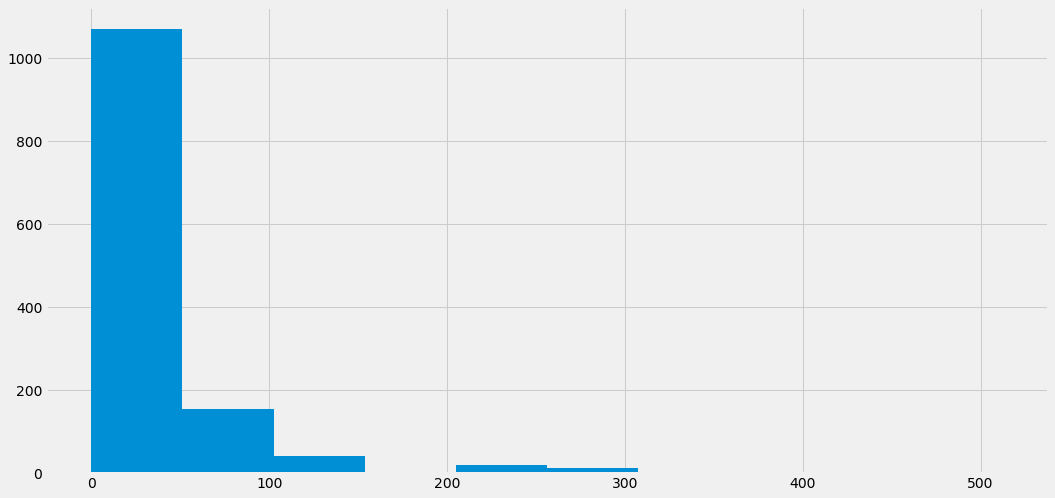

In [33]:
feats.Fare.hist()

In [34]:
feats['Fare'] = feats['Fare'].apply(np.log1p)

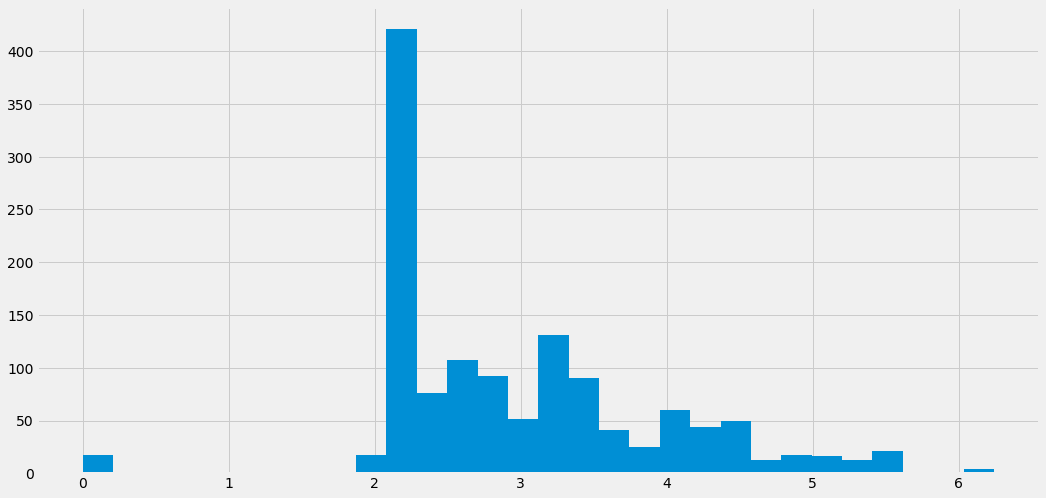

In [37]:
feats['Fare'].hist(bins=30)

In [38]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [39]:
feats['Companion'] = feats['SibSp'] + feats['Parch']

In [40]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   1309 non-null   float64
 1   Pclass     1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1046 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1309 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1307 non-null   object 
 11  Companion  1309 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [41]:
feats.loc[feats['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Companion
PassengerId,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.3944,B28,NaN,0
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.3944,B28,NaN,0


In [42]:
feats['Embarked'].fillna('S', inplace=True)

In [43]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   1309 non-null   float64
 1   Pclass     1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1046 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1309 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1309 non-null   object 
 11  Companion  1309 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


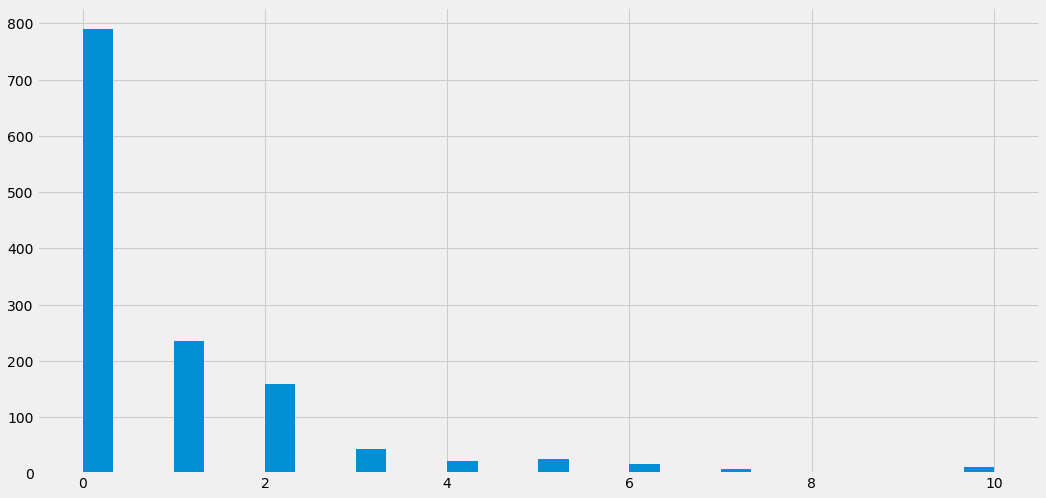

In [44]:
feats['Companion'].hist(bins=30)

In [50]:
#feats['Companion'] = feats['Companion'].apply(np.log1p) ; applied twice but still power-form

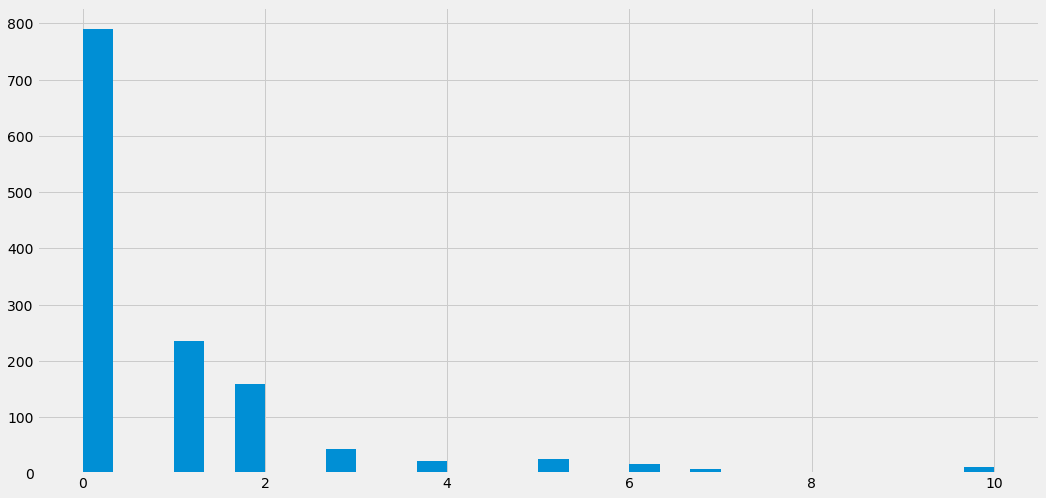

In [51]:
feats['Companion'].hist(bins=30)

In [52]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   1309 non-null   float64
 1   Pclass     1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1046 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1309 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1309 non-null   object 
 11  Companion  1309 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 132.9+ KB


In [53]:
feats.loc[feats['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Companion
PassengerId,,,,,,,,,,,,
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.2469,NaN,Q,0.0
18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.6391,NaN,S,0.0
20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,2.1072,NaN,C,0.0
27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,2.1072,NaN,C,0.0
29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.1837,NaN,Q,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,-1.0,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,2.1657,NaN,Q,0.0
1302,-1.0,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,2.1691,NaN,Q,0.0
1305,-1.0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.2028,NaN,S,0.0


In [54]:
feats['Age'].fillna(feats['Age'].mean(),inplace=True)

In [55]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   1309 non-null   float64
 1   Pclass     1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1309 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1309 non-null   float64
 9   Cabin      295 non-null    object 
 10  Embarked   1309 non-null   object 
 11  Companion  1309 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 132.9+ KB


In [56]:
feats.drop(['Cabin'], axis=1,inplace=True)

In [57]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   1309 non-null   float64
 1   Pclass     1309 non-null   int64  
 2   Name       1309 non-null   object 
 3   Sex        1309 non-null   object 
 4   Age        1309 non-null   float64
 5   SibSp      1309 non-null   int64  
 6   Parch      1309 non-null   int64  
 7   Ticket     1309 non-null   object 
 8   Fare       1309 non-null   float64
 9   Embarked   1309 non-null   object 
 10  Companion  1309 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.7+ KB


In [58]:
feats.corr().style.background_gradient()

,Survived,Pclass,Age,SibSp,Parch,Fare,Companion
Survived,1.0000,-0.1268,-0.0450,0.0125,0.0282,0.1213,0.0236
Pclass,-0.1268,1.0000,-0.3664,0.0608,0.0183,-0.6853,0.0500
Age,-0.0450,-0.3664,1.0000,-0.1907,-0.1309,0.1742,-0.1970
SibSp,0.0125,0.0608,-0.1907,1.0000,0.3736,0.3113,0.8620
Parch,0.0282,0.0183,-0.1309,0.3736,1.0000,0.3233,0.7923
Fare,0.1213,-0.6853,0.1742,0.3113,0.3233,1.0000,0.3815
Companion,0.0236,0.0500,-0.1970,0.8620,0.7923,0.3815,1.0000


In [59]:
feats.to_csv(feature_file)

In [60]:
!ls -alF

total 264
drwxr-xr-x 1 root root   4096 Aug 12 07:05 ./
drwxr-xr-x 1 root root   4096 Aug 12 05:42 ../
drwxr-xr-x 4 root root   4096 Jul 16 13:19 .config/
-rw-r--r-- 1 root root 122364 Aug 12 07:05 feature.csv
drwxr-xr-x 1 root root   4096 Jul 16 13:20 sample_data/
-rw-r--r-- 1 root root   3258 Nov 19  2019 submission.csv
-rw-r--r-- 1 root root  28629 Nov 18  2019 test.csv
-rw-r--r-- 1 root root  34348 Aug 12 05:49 titanic_data.zip
-rw-r--r-- 1 root root  61194 Nov 18  2019 train.csv


In [61]:
files.download(feature_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>